### **Case Study II : Unsupervised Learning**
#### **A wholesale distributor wants to understand its diverse customer base by uncovering naturally occurring groups in its purchasing data. The goal is to reveal hidden patterns in spending behavior without any prior labeling of the customers.**
#### The data includes spending amounts in several product categories such as:
#####    Fresh: Expenditure on fresh products
#####    Milk: Expenditure on milk products
#####    Grocery: General grocery spending
#####    Frozen: Spending on frozen items
#####    Detergents_Paper: Spending on detergents and paper products
#####    Delicatessen: Spending on delicatessen items
#####    Additionally, the dataset contains categorical variables like Channel and Region.
#### **Follow up Questions:**
#####    Are there any attributes which are highly correlated?
#####    How can you quantify the quality of your solution?
#####    What are the most important attributes?
#####    Can you draw some insights for the identified groups?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("Wholesale_customers_data.csv")

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.shape

(440, 8)

In [6]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [7]:
df.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

### **Step1: Check for highly correlated values using correlation matrics**

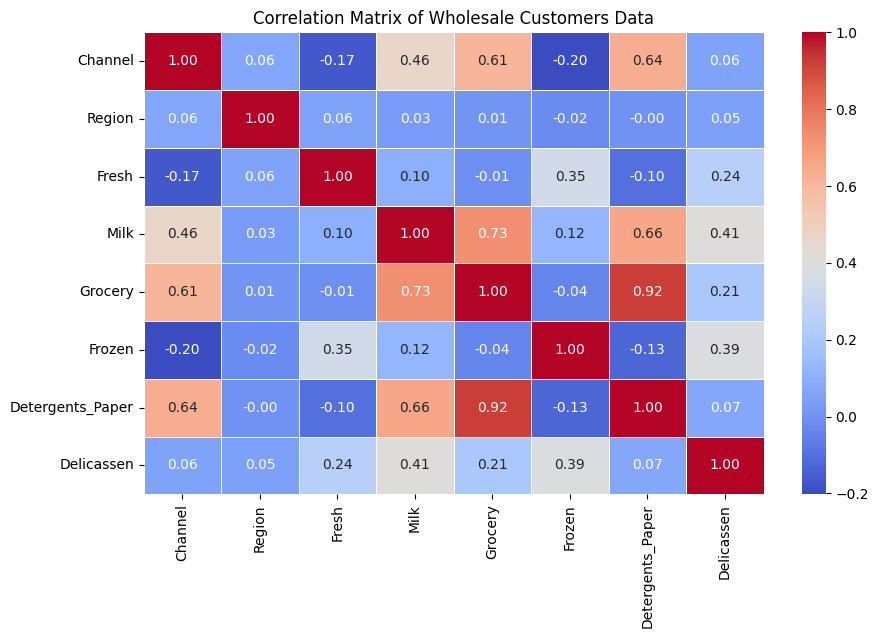

In [8]:
correlation_matrix = df.corr()
# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Wholesale Customers Data")
plt.show()

### **Step 2 :Perform clustering analysis to group similar clusters**

In [19]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [10]:
# selecting only the numerical columns for the clustering
X = df.drop(columns=['Channel','Region'])

In [11]:
X

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [15]:
# Scaling the data using the standard scalar
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [26]:
# Finding the optimal number of clusters using the elbow method
wcss =[] # this is within-cluster sum of squares array. It is used to determine how well the cluster groups the data point in that perticular cluster. Ideally lower value of wcss considered to be the well grouped cluster
silhouette_scores =[]
k_vals = range(2,10)

for k in k_vals:
    K_means =KMeans(n_clusters=k ,random_state= 42, n_init= 10)
    labels =K_means.fit_predict(X_scaled)
    wcss.append(K_means.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled,labels))

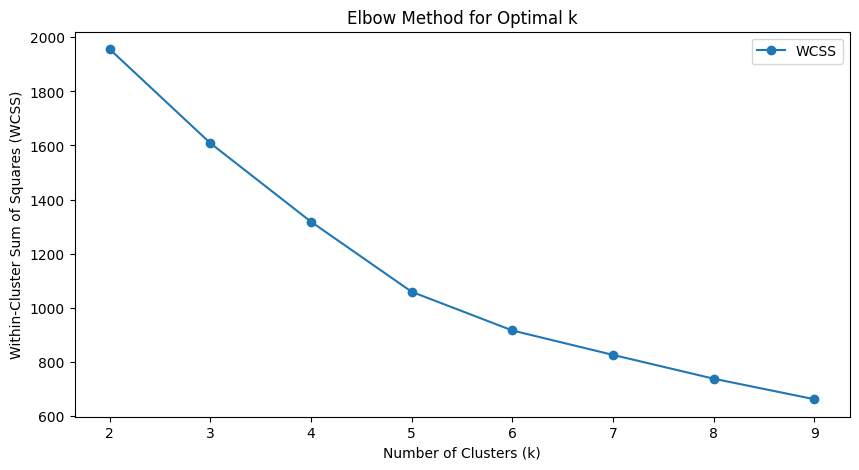

In [27]:
#Plotting the graph to visualize the elbow point

plt.figure(figsize=(10,5))
plt.plot(k_vals, wcss, marker='o', linestyle='-', label='WCSS')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method for Optimal k")
plt.legend()
plt.show()

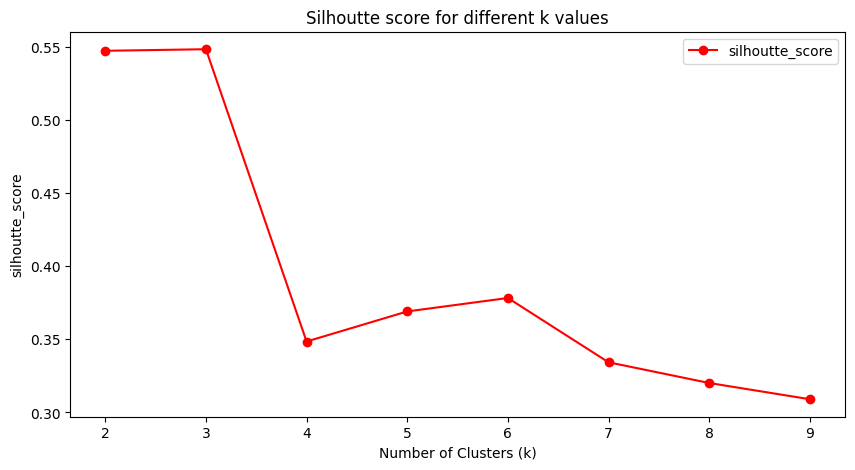

In [28]:
# Plotting the silhoutte score vs the no of clusters graph 
plt.figure(figsize=(10,5))
plt.plot(k_vals, silhouette_scores, marker='o', linestyle='-', label='silhoutte_score',color ='red')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("silhoutte_score")
plt.title("Silhoutte score for different k values")
plt.legend()
plt.show()

In [33]:
# from above two graph , we get an insight as optimal k for k-means clustering should be 3 as it has large sillhoutte score as well

optimal_k = 3
kmeans =KMeans(n_clusters=optimal_k ,random_state=42,n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)
print(df)

     Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  10290   1981     2232    1038               168   
439        1       3   2787   1698     2510      65               477   

     Delicassen  Cluster  
0          1338        1  
1          1776        1  
2          7844        1  
3          1788

In [38]:
# plotting the clustering graph using PCA
from sklearn.decomposition import PCA
# Reduce the multiple features in two dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Applying k-means with k=3 on X_pca
kMeans =KMeans(n_clusters=3 ,random_state=42,n_init=10)
labels = kMeans.fit_predict(X_pca)


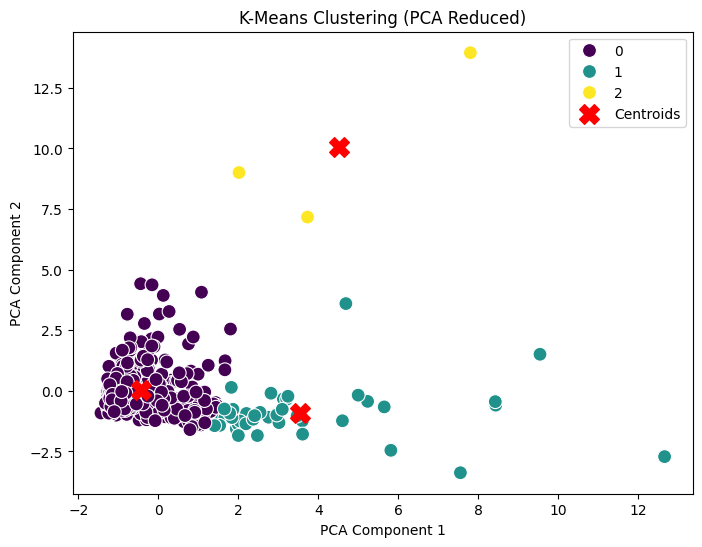

In [39]:
# Plotting the graph for visualizing the clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette="viridis", s=100)
plt.scatter(kMeans.cluster_centers_[:, 0], kMeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label="Centroids")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Means Clustering (PCA Reduced)")
plt.legend()
plt.show()